#### 傅里叶变换
> 我们生活在时间的世界中，早上7:00起床吃早饭，8:00挤地铁，9：00上班，以时间为参照系，就是时域分析
> 但在频域中，一切都是静止的
> https://zhuanlan.zhihu.com/p/19763358

#### 傅里叶变换的作用
 - 高频：变化剧烈的灰度分量，例如边界
 - 低频：变化缓慢的灰度分量，例如一片大海

#### 滤波
 - 低通滤波器：只保留低频，使得图像模糊
 - 高通滤波器，只保留高频，会使得图像细节增强
 
 - opencv中主要就是cv2.dft()和cv2.idft(),输入图像需要先转换为np.float32格式
 - 得到的结果中频率为0的部分会在左上角，通常要转换到中心位置，可以通过shift变换来实现
 - cv2.dft()返回的结果是双通道的(实部，虚部)，通常还需要转换成图像格式才能展示(0,255)

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

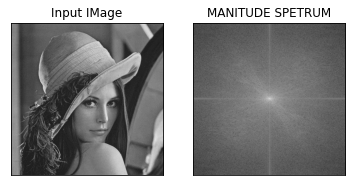

In [6]:
img = cv2.imread('images/lena.jpg',0)
img_float32 = np.float32(img)

dft = cv2.dft(img_float32,flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
# 得到灰度图能表示的形式
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img,cmap='gray')
plt.title('Input IMage'),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum,cmap='gray')
plt.title('MANITUDE SPETRUM'),plt.xticks([]),plt.yticks([])
plt.show()

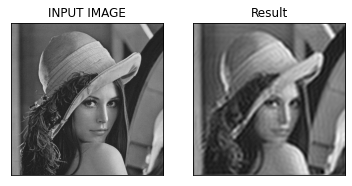

In [16]:
img = cv2.imread('images/lena.jpg',0)
img_float32 = np.float32(img)

dft = cv2.dft(img_float32,flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows,cols = img.shape
crow,ccol = int(rows/2) , int(cols/2)
# 低通滤波
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30,ccol-30:ccol+30]= 1

# IDFT
fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img,cmap='gray')
plt.title('INPUT IMAGE'),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(img_back,cmap='gray')
plt.title('Result'),plt.xticks([]),plt.yticks([])
plt.show()

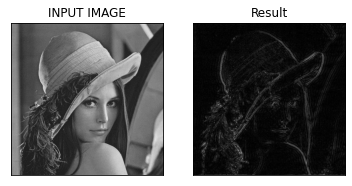

In [17]:
img = cv2.imread('images/lena.jpg',0)
img_float32 = np.float32(img)

dft = cv2.dft(img_float32,flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows,cols = img.shape
crow,ccol = int(rows/2) , int(cols/2)
# 高通滤波
mask = np.ones((rows,cols,2),np.uint8)
mask[crow-30:crow+30,ccol-30:ccol+30]= 0

# IDFT
fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img,cmap='gray')
plt.title('INPUT IMAGE'),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(img_back,cmap='gray')
plt.title('Result'),plt.xticks([]),plt.yticks([])
plt.show()


